In [34]:
import parliament as P
import numpy as np

In [35]:
reorder_array = [8,1,2,0,11,9,6,7,4,12,10,3,13,5]

parties = [
    "CDU", # 8
    "SPD", # 1
    "GRÜNE", # 2
    "DIE LINKE", # 0
    "AfD", # 11
    "CSU", # 9
    "FDP", # 6
    "FREIE WÄHLER", # 7
    "PIRATEN", # 4
    "Tierschutzpartei", # 12
    "FAMILIE", # 10
    "ÖDP", # 3
    "Die PARTEI", # 13
    "Volt" # 5
]
# order within political spectrum
parties = np.array(parties)[np.argsort(reorder_array)]


party_colors_eu = {
    "CDU": "#3399FF",
    "SPD": "#FF0000",        
    "GRÜNE": "#009900",     
    "DIE LINKE": "#990000",  
    "AfD": "#2b3856",        
    "CSU": "#3399FF",        
    "FDP": "#FFFF00",        
    "FREIE WÄHLER": "#FFFF00", 
    "PIRATEN": "#009900",    
    "Tierschutzpartei": "#cccccc", 
    "FAMILIE": "#3399FF",    
    "ÖDP": "#009900",        
    "Die PARTEI": "#cccccc", 
    "Volt": "#009900"        
}

party_colors = {
    "CDU": "#44448a",
    "SPD": "#cc0033",        
    "GRÜNE": "#32a460",     
    "DIE LINKE": "#8f57c7",  
    "AfD": "#36cac5",        
    "CSU": "#0089c4",        
    "FDP": "#ffcc33",        
    "FREIE WÄHLER": "#8db4e3", 
    "PIRATEN": "#ff6600",    
    "Tierschutzpartei": "#92b64e", 
    "FAMILIE": "#dd1d7d",    
    "ÖDP": "#ed9f0d",        
    "Die PARTEI": "#c74933",
    "Volt": "#7f1f5f"        
}

party_colors_eu_eu_parties = {
    "EVP": "#3399FF",
    "S&D": "#FF0000",
    "Renew": "#FFFF00",  
    "Grüne/EFA": "#009900",
    "ID":"#2b3856",
    "Die Linke":"#990000",
    "Non-Inscrits":"#cccccc"
}


data = np.array([
    [39.5,53.9,61.8,73.7,42.1,39.5,44.7,50.0,68.4,65.8,47.4,65.8,71.1,60.5],
    [42.1,48.7,64.5,71.1,39.5,42.1,44.7,50.0,65.8,65.8,44.7,60.5,63.2,60.5],
    [53.9,63.2,73.7,61.8,30.3,53.9,56.6,64.5,67.1,75.0,61.8,69.7,64.5,72.4],
    [52.6,75.0,88.2,78.9,21.1,52.6,60.5,65.8,86.8,86.8,60.5,76.3,78.9,84.2],
    [50.0,56.6,67.1,71.1,36.8,50.0,55.3,65.8,57.9,63.2,52.6,71.1,60.5,60.5]
])

In [36]:
# total seats: 705
# 2024: 720

total_seats = 720
alignments = np.mean(data,axis=0)
seats = np.round((alignments / np.sum(alignments))*total_seats)

#adjust for one seat too much
after_decimal_point = ((alignments / np.sum(alignments))*total_seats)-(np.floor((alignments / np.sum(alignments))*total_seats))
after_decimal_point[after_decimal_point<0.5] = 1.
seats[np.argmin(after_decimal_point)]-=1
seats = np.array(seats)[np.argsort(reorder_array)]

# Die PARTEI split into Die PARTEI and semsrott, who joined the greens.
rearranged_seats = (seats[np.where(parties=='Die PARTEI')]/2)
seats[np.where(parties=='Die PARTEI')]-=rearranged_seats
seats[np.where(parties=='GRÜNE')]+=rearranged_seats

In [37]:
parties_seat_allocation = [[parties[i],int(seats[i]),party_colors_eu[parties[i]]] for i in range(len(seats))]
with open("seats_eu_colors.svg", "w") as svg_file:
        svg_file.write(P.render_svg(parties_seat_allocation))
parties_seat_allocation = [[parties[i],int(seats[i]),party_colors[parties[i]]] for i in range(len(seats))]
with open("seats_de_colors.svg", "w") as svg_file:
        svg_file.write(P.render_svg(parties_seat_allocation))

In [38]:
parties

array(['DIE LINKE', 'SPD', 'GRÜNE', 'ÖDP', 'PIRATEN', 'Volt', 'FDP',
       'FREIE WÄHLER', 'CDU', 'CSU', 'FAMILIE', 'AfD', 'Tierschutzpartei',
       'Die PARTEI'], dtype='<U16')

In [39]:
import matplotlib.pyplot as plt

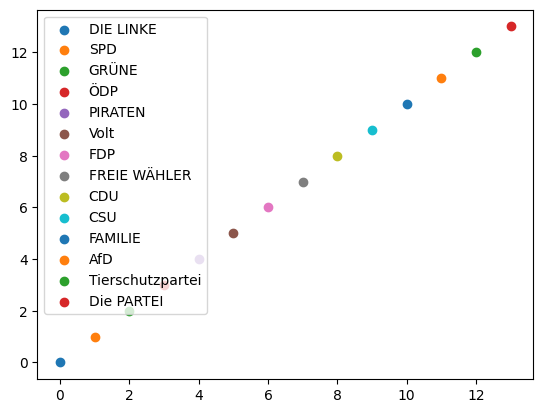

In [44]:
for i in range(len(parties)):
    plt.scatter(i,i,label=parties[i])
plt.legend()